# Investigations

---------------------------------------------------------------------------
Files already downloaded and verified
Files already downloaded and verified
Query resnet50 victim on cifar_10 dataset with query size 10000
    - input:10000 queried:(10000, 2)
-----------------------------------------------------------------------------
-----------------------Dataset: cifar_10----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: random Query Size: 20000-------------------
Query resnet50 victim on cifar_10 dataset with query size 20000
    - input:50000 queried:(20000, 2)
epoch 1
    - train_acc 0.14975 train_loss 2.21203
    - test_acc  0.20600 test_loss  2.18542
epoch 2
    - train_acc 0.21005 train_loss 2.35666
    - test_acc  0.23220 test_loss  1.97343
epoch 3
    - train_acc 0.28245 train_loss 1.85515
    - test_acc  0.33530 test_loss  1.88847
epoch 4
    - train_acc 0.36460 train_loss 1.70384
    - test_acc  0.38680 test_loss  1.70

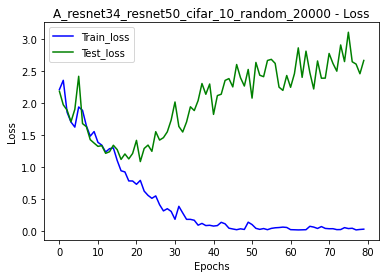

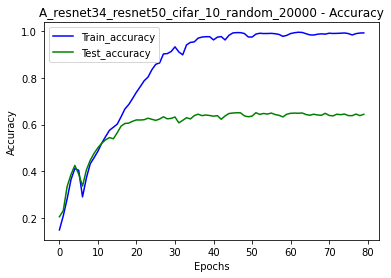

{'Victim': 'resnet50', 'Dataset': 'cifar_10', 'QueryType': 'random', 'QuerySize': 20000, 'Attacker': 'resnet34', 'Train Loss': 0.0263, 'Train Accuracy': 99.24, 'Test Loss': 2.6676, 'Test Accuracy': 64.44}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar_10----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: coreset Query Size: 20000-------------------
Query resnet50 victim on cifar_10 dataset with query size 20000
    - input:50000 queried:(20000, 2)
epoch 1
    - train_acc 0.11160 train_loss 2.45057
    - test_acc  0.12370 test_loss  2.38594
epoch 2
    - train_acc 0.12770 train_loss 2.36156
    - test_acc  0.15330 test_loss  2.36352
epoch 3
    - train_acc 0.14275 train_loss 2.33956
    - test_acc  0.18000 test_loss  2.24437
epoch 4
    - train_acc 0.14600 train_loss 2.31640
    - te

    - test_acc  0.30510 test_loss  6.61806


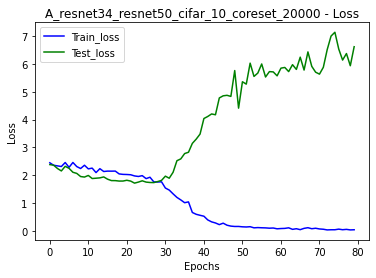

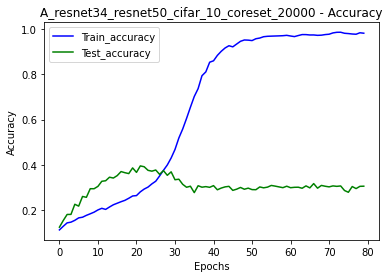

{'Victim': 'resnet50', 'Dataset': 'cifar_10', 'QueryType': 'coreset', 'QuerySize': 20000, 'Attacker': 'resnet34', 'Train Loss': 0.0452, 'Train Accuracy': 98.21, 'Test Loss': 6.6181, 'Test Accuracy': 30.51}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar_10----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: coreset_cross Query Size: 20000-------------------
Query resnet50 victim on cifar_10 dataset with query size 20000
    - input:50000 queried:(20000, 2)
epoch 1
    - train_acc 0.11635 train_loss 2.40370
    - test_acc  0.18840 test_loss  2.32707
epoch 2
    - train_acc 0.14545 train_loss 2.48556
    - test_acc  0.19170 test_loss  2.27672
epoch 3
    - train_acc 0.14415 train_loss 2.39810
    - test_acc  0.13960 test_loss  2.59098
epoch 4
    - train_acc 0.14905 train_loss 2.26350
 

    - test_acc  0.30020 test_loss  6.51221


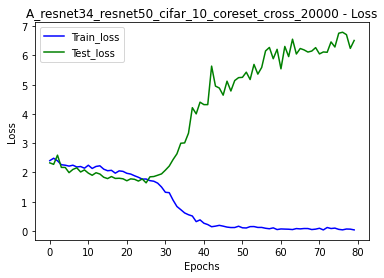

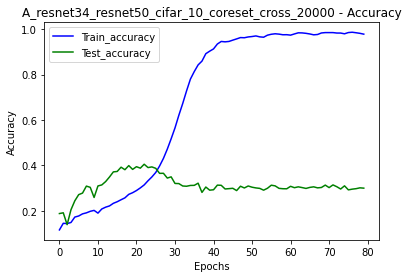

{'Victim': 'resnet50', 'Dataset': 'cifar_10', 'QueryType': 'coreset_cross', 'QuerySize': 20000, 'Attacker': 'resnet34', 'Train Loss': 0.0357, 'Train Accuracy': 97.81, 'Test Loss': 6.5122, 'Test Accuracy': 30.02}
-----------------------------------------------------------------------------


In [4]:
Results = []
# Iterate through Victim Model & Dataset
for victim in parameters["victim"]:
    print('---------------------------------------------------------------------------')
    # get dataset in dataloader
    trainloader, testloader, outputs = getDataset(victim["data"])

    # query test data
    querytestloader = QueryVictim(victim, outputs, testloader, len(testloader.dataset))
    
    # Iterate through Attacker Model
    for attacker_type in parameters["attacker"]:
        # Iterate Through Query Type
        for querytype in parameters["query_type"]:
            # Iterate Through Query Size
            for size in parameters["query_size"]:
                print('-----------------------------------------------------------------------------')
                print(f'-----------------------Dataset: {victim["data"]}----------------------------')
                print(f'--------Victim: {victim["model_name"]} Attacker: {attacker_type}------------')
                print(f'---------------Query Type: {querytype} Query Size: {size}-------------------')

                # query train data
                querytrainloader = QueryVictim(victim, outputs, trainloader, size, query_type=querytype)

                # initialize attacker model
                attacker = getModel(attacker_type, outputs)

                # train attacker model
                attacker_result = Training(attacker, querytrainloader, querytestloader, (-1, 3, 32, 32), config["epochs"], 
                                           optimizer=torch.optim.Adam(attacker.parameters(), lr=config["learning_rate"]),
                                           loss=torch.nn.CrossEntropyLoss())

                # save & visualize model inference
                title = f'A_{attacker_type}_{victim["model_name"]}_{victim["data"]}_{querytype}_{size}'
                percent = SaveVisualize(attacker, attacker_result, title)
                results_dict={"Victim":victim["model_name"],
                                "Dataset":victim["data"],
                                "QueryType": querytype,
                                "QuerySize": size,
                                "Attacker": attacker_type,
                                "Train Loss": percent[0],
                                "Train Accuracy": percent[1],
                                "Test Loss": percent[2],
                                "Test Accuracy": percent[3]}

                print(results_dict)
                Results.append(results_dict)
                print('-----------------------------------------------------------------------------')